# DATA 620 HW 2.1 Graph Visualization
# Yina Qiao






This week's assignment is to:
1. Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing. You may either code the functions by hand (to build your
intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission.

# **Import libary and data wrangling**

The data is from http://snap.stanford.edu/data source library


This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

I downloaded and saved it to a csv file in my github.


In [1]:
import requests
import csv
import networkx as nx
import seaborn as sns
#import statistics as stat
#import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



file_url = 'https://raw.githubusercontent.com/yinaS1234/data-620/main/facebook_combined%20(1)%202.txt'

#requests.get() function is used to fetch the file content from the given URL. 
response = requests.get(file_url)
#The file content is then accessed using response.text
data = response.text

#create edges list
edges = []
for line in data.split('\n'):
    nodes = line.split(' ')
    if len(nodes) >= 2:
        edge = (nodes[0], nodes[1])
        edges.append(edge)

create the graph

In [2]:
G = nx.Graph(edges)

In [3]:
G

visualize the graph

In [4]:
from networkx.drawing import layout
layout=nx.spring_layout(G)

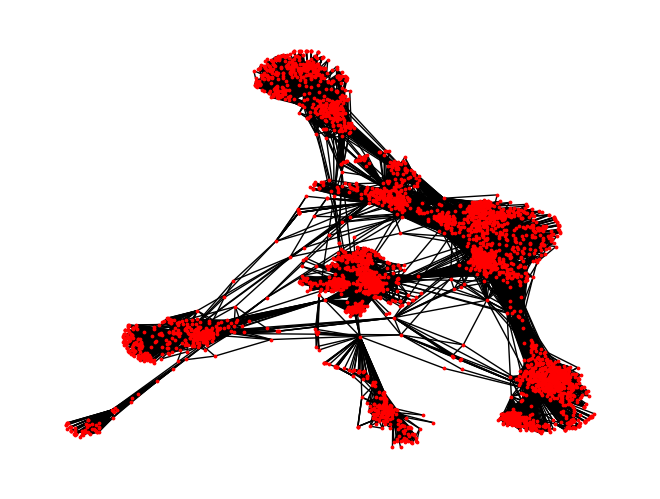

In [5]:
nx.draw(G,layout,node_size=3, node_color='red')

# Baisc statistics and analysis
---number of nodes 

---number of edges

---average degree

---average shortest path

---diameter

--- degree centrality

In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

average_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average degree: {average_degree}")

Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784


In [7]:
avg_shortest_path = nx.average_shortest_path_length(G)
print(f"Average shortest path length: {avg_shortest_path}")

Average shortest path length: 3.6925068496963913


In [8]:
graph_diameter = nx.diameter(G)
print(f"Graph diameter: {graph_diameter}")

Graph diameter: 8


In [9]:
degree_centralities = nx.degree_centrality(G)

# Sort nodes based on degree centrality in descending order
sorted_nodes = sorted(degree_centralities, key=degree_centralities.get, reverse=True)

# Get the three most important nodes
top_nodes = sorted_nodes[:3]

# Print the most important nodes and their degree centralities
for node in top_nodes:
    centrality = degree_centralities[node]
    print(f"Node: {node} | Degree Centrality: {centrality}")

Node: 107 | Degree Centrality: 0.258791480931154
Node: 1684 | Degree Centrality: 0.1961367013372957
Node: 1912 | Degree Centrality: 0.18697374938088163


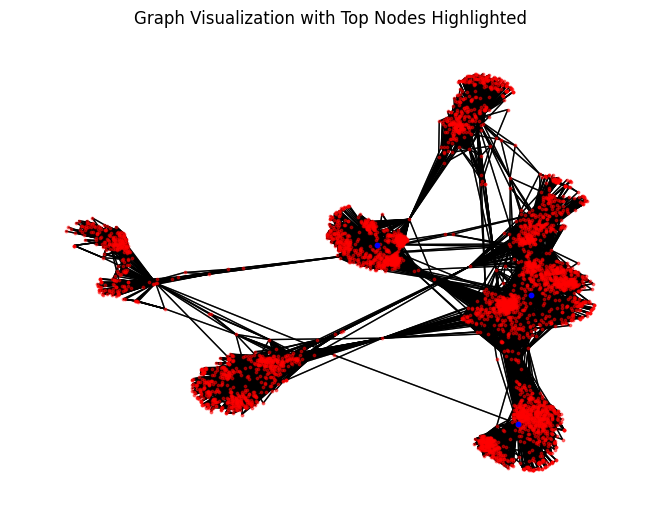

In [10]:
# Draw the original graph with the top nodes highlighted in blue
pos = nx.spring_layout(G)  # Define the layout for visualization
nx.draw(G, pos,  node_color='red', node_size=3, alpha=0.5)

# Highlight the most important nodes in blue
nx.draw(G, pos, nodelist=top_nodes, node_color='blue', node_size=10)

# Display the graph visualization
plt.title("Graph Visualization with Top Nodes Highlighted")
plt.show()

In [11]:
nx.write_gexf(G, 'graph.gexf')

# Visualize in Gephi

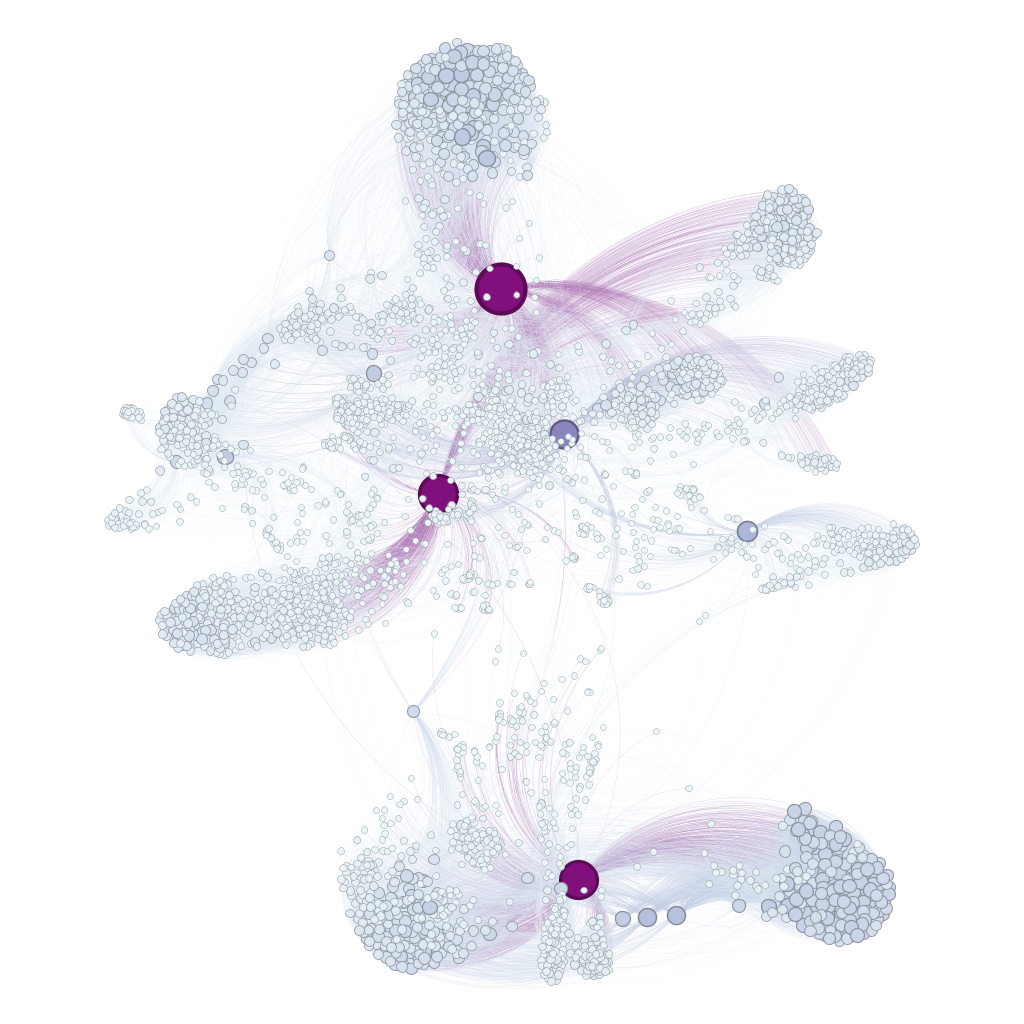